In [13]:
 #Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ananya\Downloads\sales_data.csv\advertising.csv')

In [15]:
#First few rows to understand structure

df = pd.read_csv(r'C:\Users\ananya\Downloads\sales_data.csv\advertising.csv')
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
#Dataset sturcture, data types, non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
#Summary of numeric columns

df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
#Check for missing values

df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [19]:
#Check for Duplicates 
df.duplicated().sum()

0

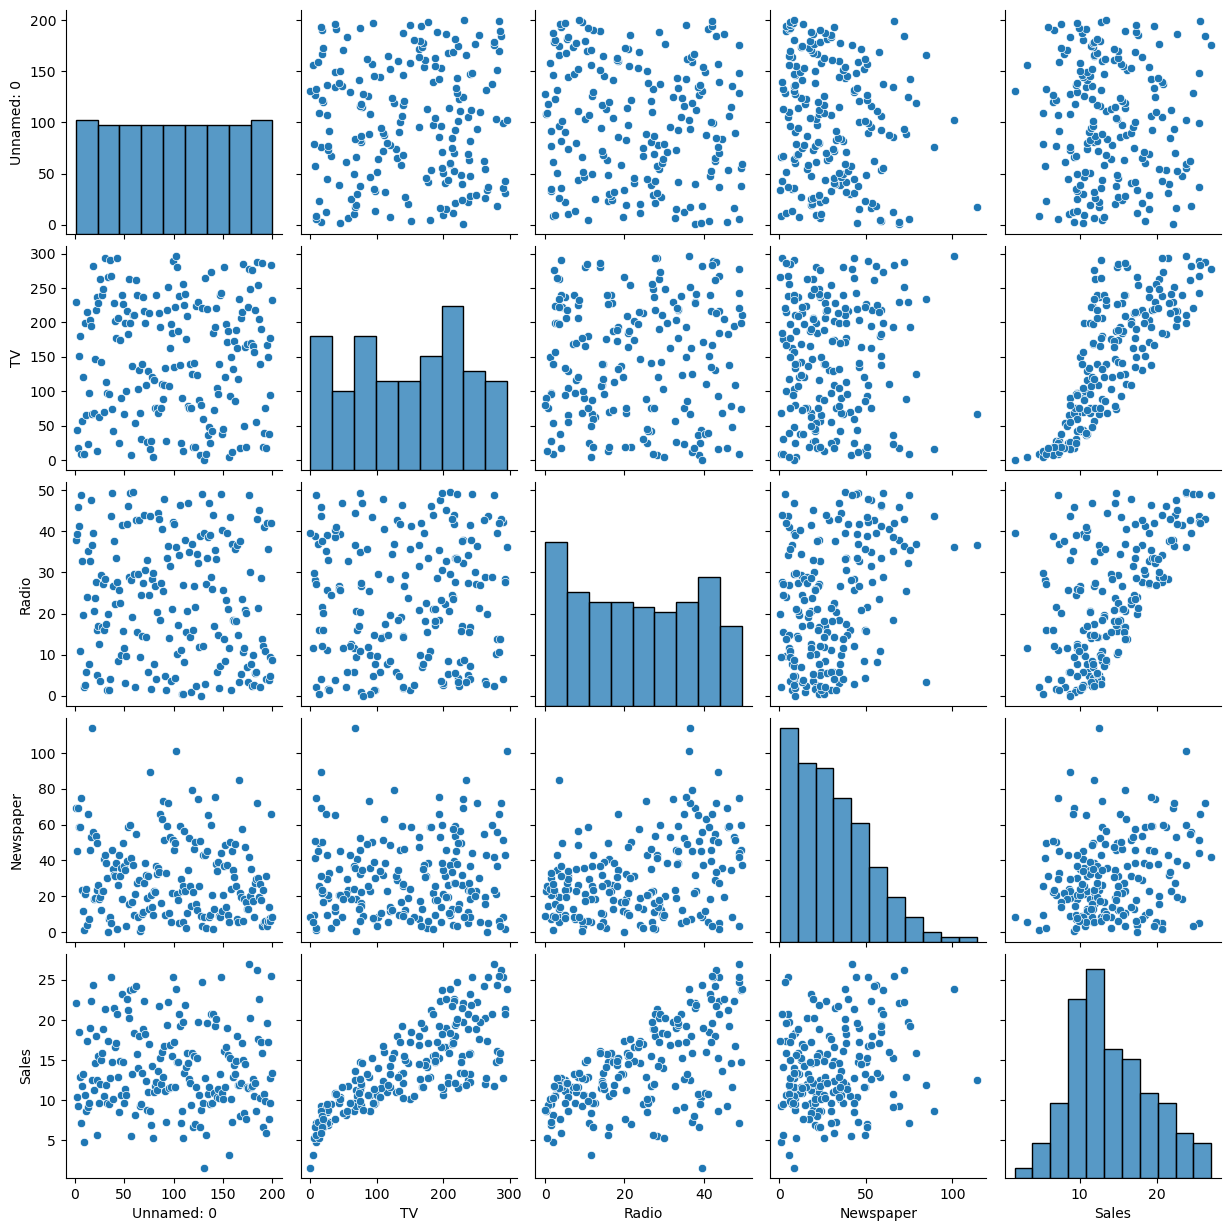

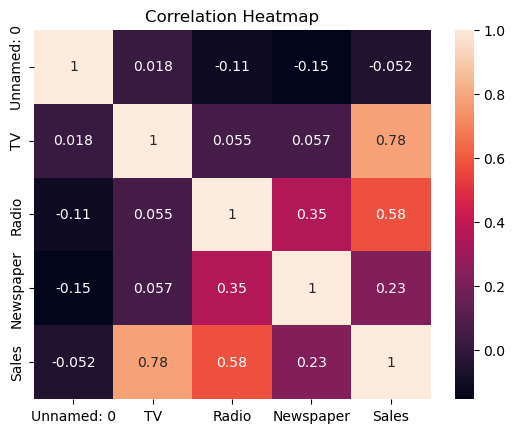

In [20]:
#Exploratory Data Analysis (EDA)
#1.Pairplot — to see overall scatterplots and relationships:

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


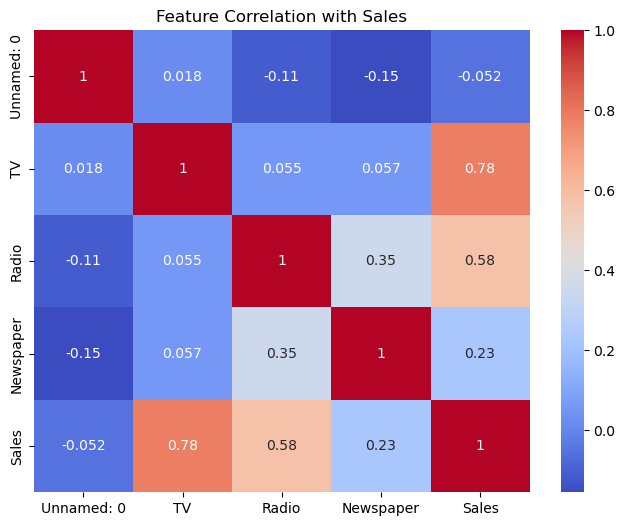

In [21]:
#2.Correlation Heatmap — to see which variables influence Sales most:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Sales")
plt.show()

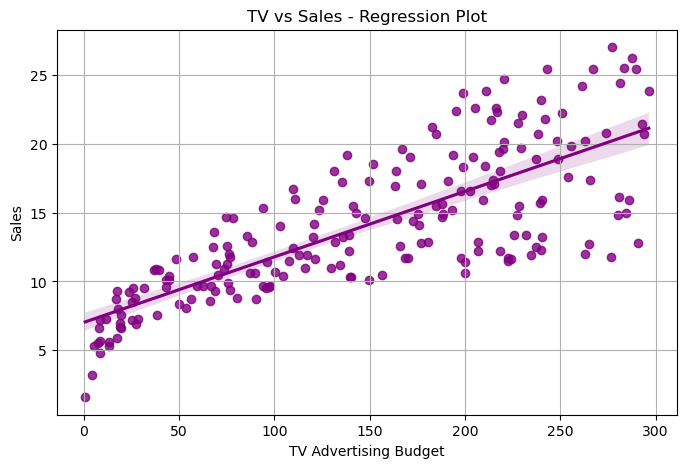

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot between TV and Sales
plt.figure(figsize=(8, 5))
sns.regplot(x='TV', y='Sales', data=df, color='purple')
plt.title('TV vs Sales - Regression Plot')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [23]:
#Feature Selection and Splitting the Data
#1.Set X (features) and y (target):

X = df.drop('Sales', axis=1) 
y = df['Sales']             

In [24]:
#2.Split the dataset into training and testing sets (80/20):

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
#3.Print shapes to confirm:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 4)
X_test shape: (40, 4)
y_train shape: (160,)
y_test shape: (40,)


In [26]:
#Model Building & Training
#1.Import and Train the Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
#2.Make Predictions

y_pred = model.predict(X_test)


In [28]:
#3.Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Mean Squared Error (MSE):", mse)
print(" R-squared (R²):", r2)


 Mean Squared Error (MSE): 3.199004468588902
 R-squared (R²): 0.8986489151417081


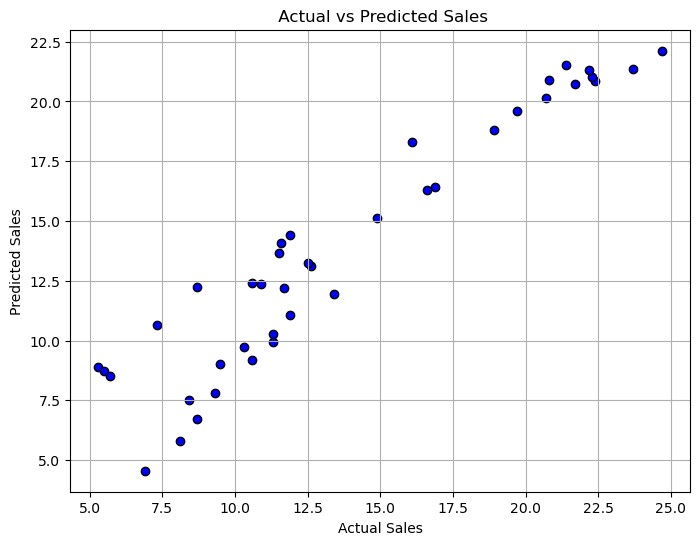

In [29]:
#Visualize the Results
#1.Compare Actual vs Predicted

import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(" Actual vs Predicted Sales")
plt.grid(True)
plt.show()

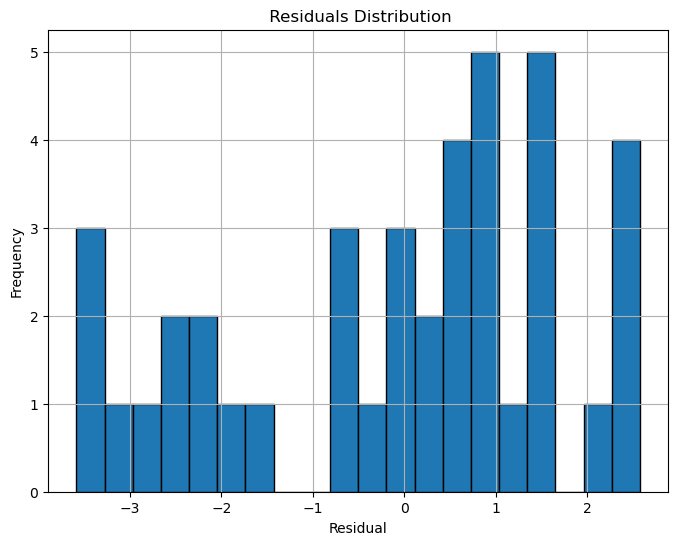

In [31]:
#2.Plot the Residuals

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title(" Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
#SHORT MARKDOWN CELL
## Conclusion & Actionable Insights

- *TV and Radio advertising are the most influential in predicting sales. Increasing budget in these areas is likely to lead to higher sales.
- *Newspaper advertising has very little impact on sales and may not be a cost-effective investment.
- The model achieved a high *R² score (~0.89), showing strong predictive power.
- For better marketing performance, businesses should *focus more on TV and Radio platforms*.
- Further improvements can be made by using advanced regression or ensemble models and including more data (like seasonal trends or customer segments).


In [ ]:
#Final Results Summary

We built a *Linear Regression model* to predict sales based on advertising spend on *TV, Radio, and Newspaper*.

#Key Results:
- *TV advertising* had the highest correlation with sales (~0.78), followed by *Radio (~0.58)*.
- *Newspaper* showed very little influence on sales (~0.23).

#Model Performance:
- The model was trained on 80% of the data and tested on 20%.
- It shows a strong correlation between actual and predicted sales.
- *Residuals are mostly centered around 0*, indicating a good fit.

#Visualization Insights:
- The *scatter plot of actual vs predicted sales* shows a linear trend.
- The *residual histogram* is approximately normal, which means errors are randomly distributed.

This model can help businesses understand how different advertising platforms affect their sales, and guide better budgeting decisions.
